In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [42]:
data = pd.read_csv('Student_Performance.csv')

In [43]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [44]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes':1, 'No':0})

In [45]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [46]:
random_sample = data.sample(n=200, random_state=42)

In [47]:
random_sample

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6252,5,69,0,8,2,51.0
4684,2,46,1,4,8,20.0
1731,7,56,1,7,5,46.0
4742,6,42,1,8,5,28.0
4521,7,53,0,4,6,41.0
...,...,...,...,...,...,...
4516,2,94,1,9,1,72.0
1261,3,52,1,9,1,33.0
3160,4,41,0,5,0,21.0
970,8,52,0,7,1,48.0


In [48]:
# Define the target and feature variables
x1 = random_sample[['Hours Studied', 'Previous Scores', 'Extracurricular Activities']]
y = random_sample['Performance Index']

In [97]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=0)

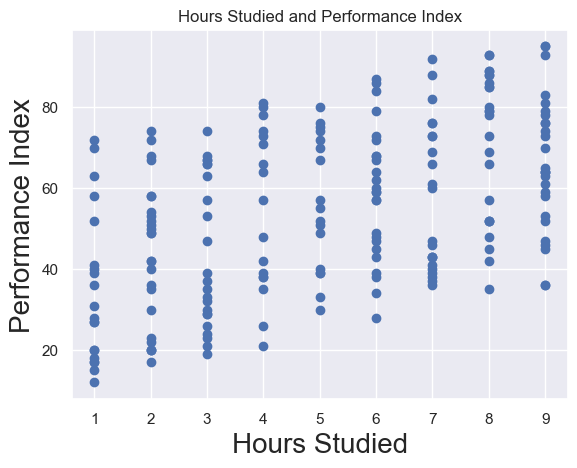

In [49]:
plt.scatter(random_sample['Hours Studied'],random_sample['Performance Index'])
plt.title('Hours Studied and Performance Index')

plt.ylabel('Performance Index', fontsize = 20)
plt.xlabel('Hours Studied',fontsize = 20)
plt.show()

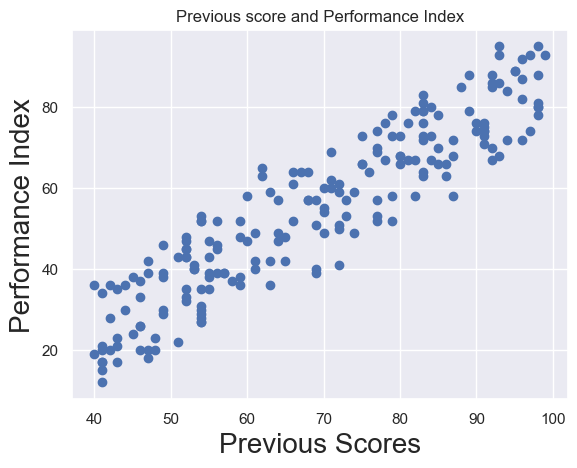

In [50]:
plt.scatter(random_sample['Previous Scores'],random_sample['Performance Index'])
plt.title('Previous score and Performance Index')

plt.xlabel('Previous Scores', fontsize = 20)
plt.ylabel('Performance Index',fontsize = 20)
plt.show()

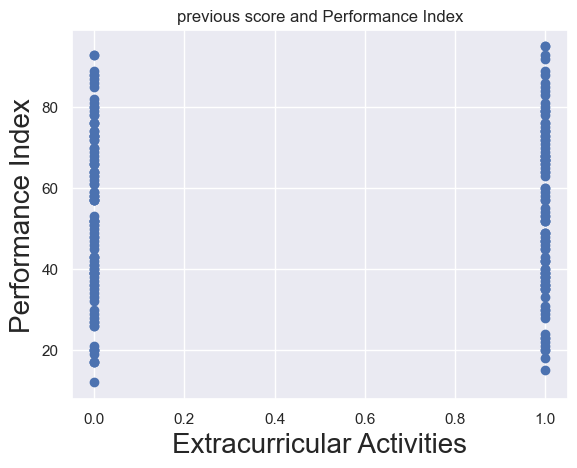

In [51]:
plt.scatter(random_sample['Extracurricular Activities'],random_sample['Performance Index'])
plt.title('previous score and Performance Index')
plt.xlabel('Extracurricular Activities', fontsize = 20)
plt.ylabel('Performance Index',fontsize = 20)
plt.show()

In [54]:
x1

,Hours Studied,Previous Scores,Extracurricular Activities
6252,5,69,0
4684,2,46,1
1731,7,56,1
4742,6,42,1
4521,7,53,0
...,...,...,...
4516,2,94,1
1261,3,52,1
3160,4,41,0
970,8,52,0


In [53]:
y

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
4516    72.0
1261    33.0
3160    21.0
970     48.0
3912    81.0
Name: Performance Index, Length: 200, dtype: float64

In [55]:
reg = LinearRegression()
reg.fit(x1,y)

LinearRegression()

In [58]:
reg.coef_

array([2.92152356, 1.01398723, 0.26379364])

In [59]:
reg.intercept_

-30.120905779773054

In [60]:
reg.score(x1,y)

0.986897871984462

In [61]:
# Let's use the handy function we created
def adj_r2(x1,y):
    r2 = reg.score(x1,y)
    n = x1.shape[0]
    p = x1.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [62]:
adj_r2(x1,y)

0.986697329208714

In [83]:
reg.predict([[5,60,1]])

C:\Users\Lenovo\anaconda37\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.58973974])

In [91]:
new_data = pd.DataFrame({'Hours Studied': [8,7,5,3], 'Previous Scores': [80,50,66,78],'Extracurricular Activities': [1,0,0,1]})


In [92]:
new_data = new_data[['Hours Studied','Previous Scores',	'Extracurricular Activities']]
new_data

,Hours Studied,Previous Scores,Extracurricular Activities
0,8,80,1
1,7,50,0
2,5,66,0
3,3,78,1


In [93]:
predictions = reg.predict(new_data)
predictions


array([74.6340551 , 41.02912086, 51.40986951, 57.99846285])

In [94]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
# Join the two data frames
marks = new_data.join(predictionsdf)

In [95]:
marks

,Hours Studied,Previous Scores,Extracurricular Activities,Predictions
0,8,80,1,74.634055
1,7,50,0,41.029121
2,5,66,0,51.409870
3,3,78,1,57.998463
